In [1]:
pip install pandas numpy scikit-learn matplotlib boto3

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import boto3
import pandas as pd

# Initialize your S3 client
s3 = boto3.client('s3')

# Download the data file from S3
bucket_name = 'final-project-group-14'
file_name = 'Cleaned_&_Wrangled_data.csv'
s3_file_path = f's3://{bucket_name}/{file_name}'

# Read the CSV file from S3
obj = s3.get_object(Bucket=bucket_name, Key=file_name)
df = pd.read_csv(obj['Body'])

# Display the first few rows of the dataframe
print(df.head())

        ID  Severity                Start_Time                  End_Time  \
0  A-56603         2  2016-12-15T17:10:12.000Z  2016-12-15T18:10:12.000Z   
1  A-56621         2  2016-12-15T18:30:26.000Z  2016-12-15T19:30:26.000Z   
2  A-56622         2  2016-12-15T18:31:53.000Z  2016-12-15T19:16:25.000Z   
3  A-56623         2  2016-12-15T18:36:23.000Z  2016-12-15T19:20:56.000Z   
4  A-56631         3  2016-12-15T19:19:14.000Z  2016-12-15T20:00:00.000Z   

   Start_Lat   Start_Lng  Distance(mi)           Street          City  County  \
0  33.854004 -117.942146          0.01  Riverside Fwy E       Anaheim  Orange   
1  33.765999 -117.929832          0.01          CA-22 E  Garden Grove  Orange   
2  33.766060 -117.925682          0.01          CA-22 E  Garden Grove  Orange   
3  33.854408 -117.794586          0.01          CA-91 W       Anaheim  Orange   
4  33.740730 -117.834290          0.01  Santa Ana Fwy S        Tustin  Orange   

   ... Country Visibility(mi) Wind_Speed(mph)  Precipita

In [3]:
# Use 10% of the dataset
df_sampled = df.sample(frac=0.1, random_state=42)

# Separate features and target variable
X = df_sampled.drop(columns=['Severity'])
y = df_sampled['Severity']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Define the preprocessor
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Define the models
rf_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
dt_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])
svm_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(random_state=42))])

# Train the models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predict the test set results
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

In [6]:
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Random Forest Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        43
           2       0.94      1.00      0.97     12287
           3       0.87      0.28      0.42       851
           4       0.33      0.01      0.02       111

    accuracy                           0.94     13292
   macro avg       0.54      0.32      0.35     13292
weighted avg       0.93      0.94      0.92     13292

Accuracy: 0.9396629551609991
Decision Tree Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        43
           2       0.96      0.98      0.97     12287
           3       0.71      0.54      0.61       851
           4       0.33      0.10      0.15       111

    accuracy                           0.95     13292
   macro avg       0.50      0.41      0.43     13292
weighted avg       0.93      0.95      0.94     13292

Accuracy: 0.9450045139933795


/home/ubuntu/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.local/li

In [1]:
import boto3
import pandas as pd

# Initialize your S3 client
s3 = boto3.client('s3')

# Download the data file from S3
bucket_name = 'final-project-group-14'
file_name = 'Cleaned_&_Wrangled_data.csv'
s3_file_path = f's3://{bucket_name}/{file_name}'

# Read the CSV file from S3
obj = s3.get_object(Bucket=bucket_name, Key=file_name)
df = pd.read_csv(obj['Body'])

# Display the first few rows of the dataframe
print(df.head())

# Use 10% of the dataset
df_sampled = df.sample(frac=0.1, random_state=42)

# Separate features and target variable
X = df_sampled.drop(columns=['Severity'])
y = df_sampled['Severity']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Define the preprocessor
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Define the models
rf_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
dt_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])
svm_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(probability=True, random_state=42))])  # Enable probabilities for SVM

# Train the models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predict the test set results
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Print classification report and accuracy for each model
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Get prediction probabilities for the ROC curve
y_pred_rf_prob = rf_model.predict_proba(X_test)  # For Random Forest
y_pred_dt_prob = dt_model.predict_proba(X_test)  # For Decision Tree
y_pred_svm_prob = svm_model.predict_proba(X_test)  # For SVM

        ID  Severity                Start_Time                  End_Time  \
0  A-56603         2  2016-12-15T17:10:12.000Z  2016-12-15T18:10:12.000Z   
1  A-56621         2  2016-12-15T18:30:26.000Z  2016-12-15T19:30:26.000Z   
2  A-56622         2  2016-12-15T18:31:53.000Z  2016-12-15T19:16:25.000Z   
3  A-56623         2  2016-12-15T18:36:23.000Z  2016-12-15T19:20:56.000Z   
4  A-56631         3  2016-12-15T19:19:14.000Z  2016-12-15T20:00:00.000Z   

   Start_Lat   Start_Lng  Distance(mi)           Street          City  County  \
0  33.854004 -117.942146          0.01  Riverside Fwy E       Anaheim  Orange   
1  33.765999 -117.929832          0.01          CA-22 E  Garden Grove  Orange   
2  33.766060 -117.925682          0.01          CA-22 E  Garden Grove  Orange   
3  33.854408 -117.794586          0.01          CA-91 W       Anaheim  Orange   
4  33.740730 -117.834290          0.01  Santa Ana Fwy S        Tustin  Orange   

   ... Country Visibility(mi) Wind_Speed(mph)  Precipita

/home/ubuntu/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.local/li

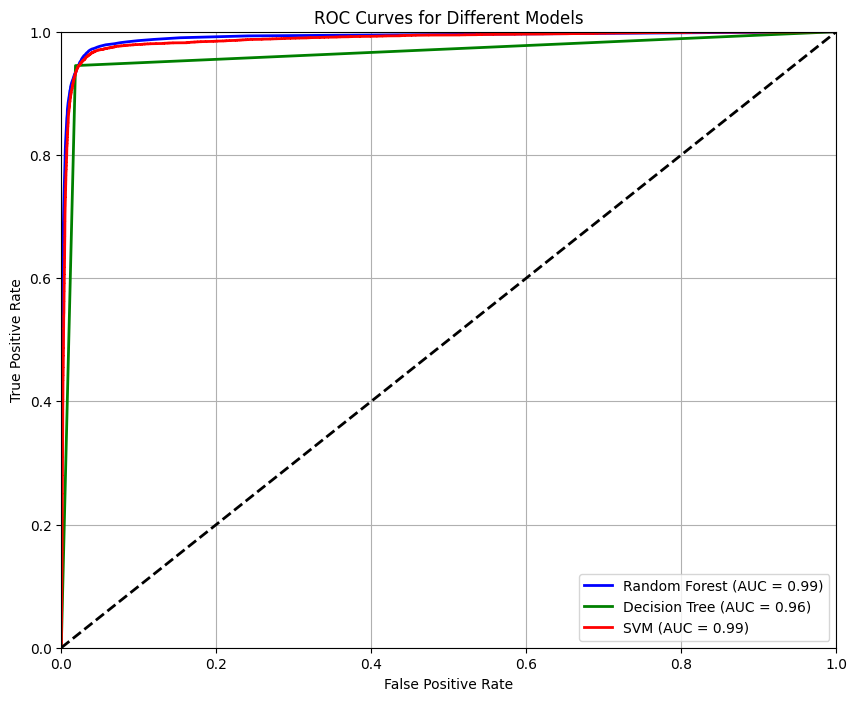

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming 'Severity' contains the labels (1, 2, 3, 4) for different classes
classes = np.unique(y)  # Unique classes in your target variable
n_classes = len(classes)

# Binarize the output: convert the labels into a binary format for ROC curves
y_test_bin = label_binarize(y_test, classes=classes)

# Initialize arrays to hold false positive and true positive rates
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve for each model
fpr['Random Forest'], tpr['Random Forest'], _ = roc_curve(y_test_bin.ravel(), y_pred_rf_prob.ravel())
roc_auc['Random Forest'] = auc(fpr['Random Forest'], tpr['Random Forest'])

fpr['Decision Tree'], tpr['Decision Tree'], _ = roc_curve(y_test_bin.ravel(), y_pred_dt_prob.ravel())
roc_auc['Decision Tree'] = auc(fpr['Decision Tree'], tpr['Decision Tree'])

fpr['SVM'], tpr['SVM'], _ = roc_curve(y_test_bin.ravel(), y_pred_svm_prob.ravel())
roc_auc['SVM'] = auc(fpr['SVM'], tpr['SVM'])

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr['Random Forest'], tpr['Random Forest'], color='blue', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc['Random Forest']))
plt.plot(fpr['Decision Tree'], tpr['Decision Tree'], color='green', lw=2, label='Decision Tree (AUC = {:.2f})'.format(roc_auc['Decision Tree']))
plt.plot(fpr['SVM'], tpr['SVM'], color='red', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc['SVM']))

# Diagonal line for random predictions
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()

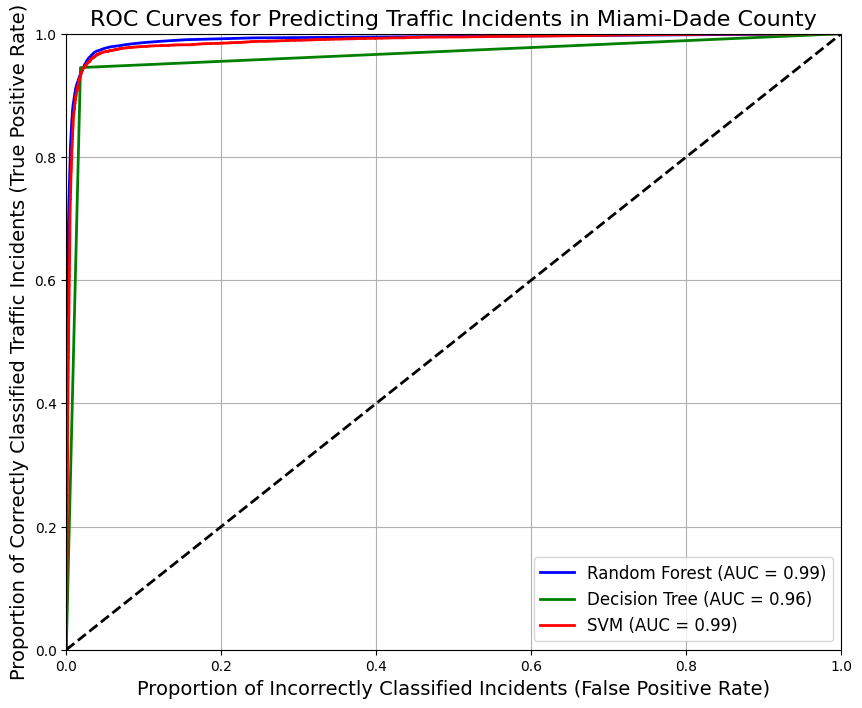

In [3]:
# Plotting the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr['Random Forest'], tpr['Random Forest'], color='blue', lw=2, 
         label='Random Forest (AUC = {:.2f})'.format(roc_auc['Random Forest']))
plt.plot(fpr['Decision Tree'], tpr['Decision Tree'], color='green', lw=2, 
         label='Decision Tree (AUC = {:.2f})'.format(roc_auc['Decision Tree']))
plt.plot(fpr['SVM'], tpr['SVM'], color='red', lw=2, 
         label='SVM (AUC = {:.2f})'.format(roc_auc['SVM']))

# Diagonal line for random predictions
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Proportion of Incorrectly Classified Incidents (False Positive Rate)', fontsize=14)
plt.ylabel('Proportion of Correctly Classified Traffic Incidents (True Positive Rate)', fontsize=14)
plt.title('ROC Curves for Predicting Traffic Incidents in Miami-Dade County', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid()
plt.show()